### Name: Ayush Jain 
### Email: ayushjain051001@gmail.com
### Phone: 8560036606

## Data description
We will be using the CIFAR-10 dataset which has 60,000 images (50,000 for training and 10,000 for testing). It is separated into 10 classes.

Dimension of each image: 32 x 32 x 3

We will be using 20% of the training data as the validation data which will be used for tuning the model and the test data will be used for final evaluation of the model. We can't use the test data as validation data as it will overfit the data.

Importing all the libraries which are required for creating the Neural NetworkS.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

Checking the version of Tensorflow and Keras for the compatibilty.

In [2]:
tf.__version__

'2.5.0'

In [3]:
keras.__version__

'2.5.0'

### NetA
It is a very basic model which will take all the inputs and will return the output using softmax activation function. It doesn't have any hidden layers.

In [4]:
# creating the class for NetA model
class NetA:
  # declaring the function which will calculate the accuracy on traning, validation and test data.    
  def calculate(self, X_train_full, y_train_full, X_test, y_test, NUM_EPOCHS):
    # Cleaning the data set
    X_train_full = X_train_full/255.
    X_test = X_test/255.
    # Separating 20% data from the train data which will be used as a validation data that will help in improving the performance and fine tuning our model
    dist = int(X_train_full.shape[0]*0.20)
    x_valid, X_train = X_train_full[:dist], X_train_full[dist:]
    y_valid, y_train = y_train_full[:dist], y_train_full[dist:]

    # Setting a seed value so that functions which uses randomness always gives the same output.
    np.random.seed(42)
    tf.random.set_seed(42)

    # Declaring a Sequential Model using Keras
    model_a = keras.models.Sequential()
    # We are adding layers to the Neural Network. We provide the input size and convert it into a 1D array for further process and calculation.
    model_a.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
    # We connect all the input layer nodes to the output layer nodes with a dense network. We will be using softmax activation function as we have 10 different class labels
    model_a.add(keras.layers.Dense(10, activation="softmax"))

    # We compile the model and tell the optimzer, loss method and metrics to be used for tuning.
    model_a.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    # We fit the model by providing the train data set and validation data for tuning and enhancement of performance.
    # Number of epochs will tell the number of iterations on whole data set and verbose will disable the output shown in the training process.
    # After fitting, it returns an object which include all the details of the model and its performance at each and every iteration/epoch while training.
    model_a_history = model_a.fit(X_train, y_train, epochs=NUM_EPOCHS,
                        validation_data=(x_valid, y_valid), verbose=0)
    
    # We use the test data set to find the accuracy that is achieved by our model.
    test_accuracy = model_a.evaluate(X_test, y_test, verbose=0)

    # We return the train and validation accuracy achieved by model with the final accuracy achieved on the test data.
    return (model_a_history.history['accuracy'], model_a_history.history['val_accuracy'], test_accuracy)

### NetB
This model is a basic model which will take all the input and will flatten the data. It will then create a one hidden layer with a dense network with relu activation function and is then connected to the output layer with softmax activation function.

In [5]:
# creating the class for NetB model
class NetB:
  # declaring the function which will calculate the accuracy on traning, validation and test data.    
  def calculate(self, X_train_full, y_train_full, X_test, y_test, NUM_EPOCHS):
    # Cleaning the data set
    X_train_full = X_train_full/255.
    X_test = X_test/255.
    # Separating 20% data from the train data which will be used as a validation data that will help in improving the performance and fine tuning our model
    dist = int(X_train_full.shape[0]*0.20)
    x_valid, X_train = X_train_full[:dist], X_train_full[dist:]
    y_valid, y_train = y_train_full[:dist], y_train_full[dist:]

    # Setting a seed value so that functions which uses randomness always gives the same output.
    np.random.seed(42)
    tf.random.set_seed(42)

    # Declaring a Sequential Model using Keras
    model_b = keras.models.Sequential()
    # We are adding layers to the Neural Network. We provide the input size and convert it into a 1D array for further process and calculation.
    model_b.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
    # We connect the flatten input layer to the hidden layer with 300 neurons. All the input nodes will be connected with each neuron in hidden layer and relu is used as an activation function.
    model_b.add(keras.layers.Dense(300, activation="relu"))
    # We connect all the hidden layer nodes to the output layer nodes with a dense network.
    model_b.add(keras.layers.Dense(10, activation="softmax"))

    # We compile the model and tell the optimzer, loss method and metrics to be used for hypertuning.
    model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    # We fit the model by providing the train data set and validation data for tuning and enhancement of performance.
    # Number of epochs will tell the number of iterations on whole data set and verbose will disable the output shown in the training process.
    # After fitting, it returns an object which include all the details of the model and its performance at each and every iteration/epoch while training.
    model_b_history = model_b.fit(X_train, y_train, epochs=NUM_EPOCHS,
                        validation_data=(x_valid, y_valid), verbose=0)
    
    # We use the test data set to find the accuracy that is achieved by our model.
    test_accuracy = model_b.evaluate(X_test, y_test, verbose=0)

    # We return the train and validation accuracy achieved by model with the final accuracy achieved on the test data set
    return (model_b_history.history['accuracy'], model_b_history.history['val_accuracy'], test_accuracy)

### NetC
This model has a Convolutional Neural Network which will be using the CNN approach such as filter, maxpooling, strides, etc. to improve the accuracy on the data set. It will have a 2D Convulational Layer with a Maxpooling layer which is then flatten and connected to the output layer.

In [6]:
# creating the class for NetA model
class NetC:
  # declaring the function which will calculate the accuracy on traning, validation and test data.    
  def calculate(self, X_train_full, y_train_full, X_test, y_test, NUM_EPOCHS):
    # Cleaning the data set
    X_train_full = X_train_full/255.
    X_test = X_test/255.
    # Separating 20% data from the train data which will be used as a validation data that will help in improving the performance and fine tuning our model
    dist = int(X_train_full.shape[0]*0.20)
    x_valid, X_train = X_train_full[:dist], X_train_full[dist:]
    y_valid, y_train = y_train_full[:dist], y_train_full[dist:]

    # Setting a seed value so that functions which uses randomness always gives the same output.
    np.random.seed(42)
    tf.random.set_seed(42)

    # Declaring a Sequential Model using Keras
    model_c = keras.models.Sequential()
    # We are adding layers to the Convolutional Neural Network. We provide the input size and activation function. We mention the
    # kernal size as (5, 5) for the value selection and filters(depth) as 25 for different variations as mentioned in the question
    model_c.add(keras.layers.Conv2D(filters=25, kernel_size=(5, 5), activation="relu",
                                  input_shape=(32, 32, 3)))
    # We create a maxpooling layer of size (2, 2) and with strides as 2 which will decrease the size of the input layer and reduces the computation cost.
    model_c.add(keras.layers.MaxPooling2D((2, 2), strides=2))
    # We convert the CNN layer into a 1D array for further calculation and processing.
    model_c.add(keras.layers.Flatten())
    # We connect all the hidden layer nodes to the output layer nodes with a dense network.
    model_c.add(keras.layers.Dense(10, activation="softmax"))

    # We compile the model and tell the optimzer, loss method and metrics to be used for hypertuning.
    model_c.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    # We fit the model by providing the train data set and validation data for tuning and enhancement of performance.
    # Number of epochs will tell the number of iterations on whole data set and verbose will disable the output shown in the training process.
    # After fitting, it returns an object which include all the details of the model and its performance at each and every iteration/epoch while training.
    model_c_history = model_c.fit(X_train, y_train, epochs=NUM_EPOCHS,
                        validation_data=(x_valid, y_valid), verbose=0)
    
    # We use the test data set to find the accuracy that is achieved by our model.
    test_accuracy = model_c.evaluate(X_test, y_test, verbose=0)

    # We return the train and validation accuracy achieved by model with the final accuracy achieved on the test data set.
    return (model_c_history.history['accuracy'], model_c_history.history['val_accuracy'], test_accuracy)

## Model Evaluation
In this section we will list the accuracy achieved by each model and will try to visualize it using graphs.


+---------------------------------------------+
|                  Model NetA                 |
+---------------------------------------------+
|   Train Accuracy      : 0.421550005674362   |
|   Validation Accuracy : 0.375499993562698   |
|   Test Accuracy       : 0.366499990224838   |
+---------------------------------------------+



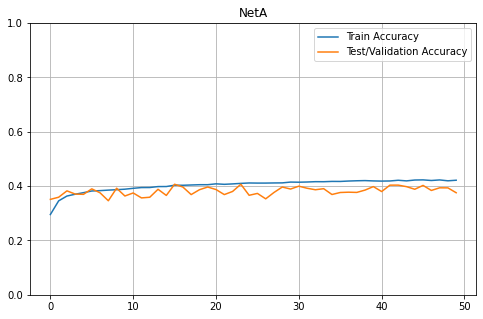




+---------------------------------------------+
|                  Model NetB                 |
+---------------------------------------------+
|   Train Accuracy      : 0.667349994182587   |
|   Validation Accuracy : 0.525300025939941   |
|   Test Accuracy       : 0.524299979209900   |
+---------------------------------------------+



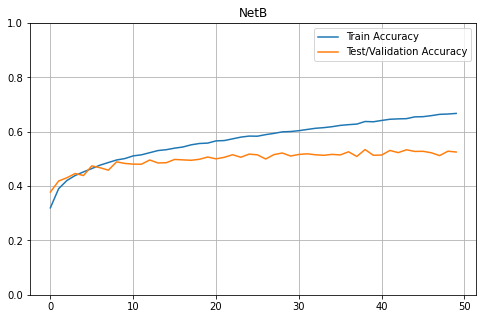




+---------------------------------------------+
|                  Model NetC                 |
+---------------------------------------------+
|   Train Accuracy      : 0.740499973297119   |
|   Validation Accuracy : 0.594099998474121   |
|   Test Accuracy       : 0.592599987983704   |
+---------------------------------------------+



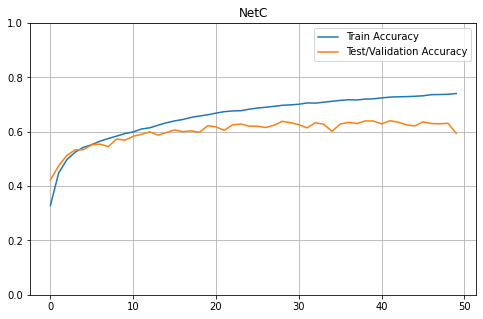

In [7]:
# We define all the classes created for each model
classes = [NetA(), NetB(), NetC()]
# We import the dataset from the dataset available in the keras library.
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
# number of iterations taken by train data for improving the performance of the model.
NUM_EPOCHS = 50


# We iterate through all the classes to evaluate all the models.
for clas in classes:
  # We try to save the model in another variable and will call the calculate funtion which will return the train, test and validation accuracy by taking train and test data with epochs as the input.
  model = clas
  train_accuracy, val_accuracy, test_accuracy = model.calculate(X_train_full, y_train_full, X_test, y_test, NUM_EPOCHS)

  # We print the accuracy achieved by the model on datasets after completing all the epochs in a tabular manner.
  print('\n+---------------------------------------------+')
  print('|                  Model {}                 |'.format(type(model).__name__))
  print('+---------------------------------------------+')
  print('|   Train Accuracy      : {0:.15f}   |'.format(train_accuracy[-1]))
  print('|   Validation Accuracy : {0:.15f}   |'.format(val_accuracy[-1]))
  print('|   Test Accuracy       : {0:.15f}   |'.format(test_accuracy[-1]))
  print('+---------------------------------------------+\n')

  # We visualize the accuracy achieved on the train and validation data after each and every epoch in the training process.
  pd.DataFrame({'Train Accuracy':train_accuracy, 'Test/Validation Accuracy':val_accuracy}).plot(figsize=(8, 5))
  plt.grid(True)
  plt.title(type(clas).__name__)
  plt.gca().set_ylim(0, 1)
  plt.legend()
  plt.show()

  print('\n')